In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
ASD = pd.read_csv('Autism_cleaned_data.csv', index_col=0)

In [3]:
ASD.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes


In [4]:
# removing 'Qchat-10-Score'
ASD.drop('Qchat-10-Score', axis = 1, inplace = True)

In [5]:
ASD.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


In [6]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

In [7]:
le = LabelEncoder()
columns = ['Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    ASD[col] = le.fit_transform(ASD[col])
ASD.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Sex                     int32
Ethnicity              object
Jaundice                int32
Family_mem_with_ASD     int32
Class/ASD Traits        int32
dtype: object

In [8]:
#For multiclass features 
ASD_final = pd.get_dummies(ASD, columns =['Ethnicity'], drop_first = True, prefix = "E")

In [9]:
ASD_final.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,E_Latino,E_Native Indian,E_Others,E_Pacifica,E_White European,E_asian,E_black,E_middle eastern,E_mixed,E_south asian
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = ASD_final.drop(['Class/ASD Traits '], axis = 1)
y = ASD_final['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 7)

In [12]:
x_train.shape

(737, 24)

In [13]:
 x_test.shape

(317, 24)

# Logistic Regression

In [14]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")
# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [16]:
ylr_pred = LR.predict(x_test)

In [17]:
print(accuracy_score(ylr_pred, y_test))

1.0


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ylr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       222

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317



In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ylr_pred))

[[ 95   0]
 [  0 222]]


# Naive Bayes 

In [20]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
ynb_pred = NB.predict(x_test)
print(accuracy_score(ynb_pred, y_test))

0.889589905362776


In [21]:
print(classification_report(y_test, ynb_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        95
           1       0.98      0.86      0.92       222

    accuracy                           0.89       317
   macro avg       0.86      0.91      0.88       317
weighted avg       0.91      0.89      0.89       317



In [22]:
print(confusion_matrix(y_test,ynb_pred))

[[ 91   4]
 [ 31 191]]


# K-Nearest Neighbors

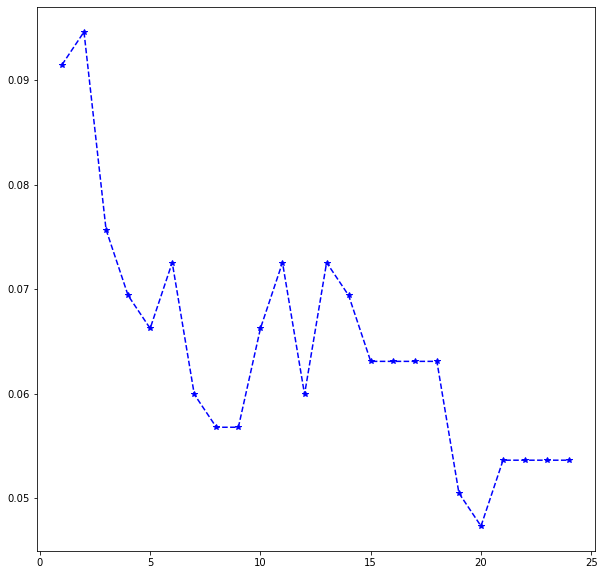

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    yknn_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != yknn_pred))
plt.figure(figsize=(10,10))
plt.plot(range(1,25), error_rate, color='blue',linestyle='dashed',marker='*')

In [24]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
yknn_pred = knn.predict(x_test)
print(accuracy_score(yknn_pred, y_test))

0.9526813880126183


In [25]:
print(classification_report(y_test, yknn_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        95
           1       0.97      0.96      0.97       222

    accuracy                           0.95       317
   macro avg       0.94      0.95      0.94       317
weighted avg       0.95      0.95      0.95       317



In [26]:
print(confusion_matrix(y_test,yknn_pred))

[[ 89   6]
 [  9 213]]


# Support Vector Machine

In [30]:
from sklearn.svm import SVC, LinearSVC
SVM = SVC()
SVM.fit(x_train, y_train)
ysvm_pred = SVM.predict(x_test)
print(accuracy_score(ysvm_pred, y_test))

0.8170347003154574


In [32]:
print(classification_report(y_test, ysvm_pred))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        95
           1       0.79      1.00      0.88       222

    accuracy                           0.82       317
   macro avg       0.90      0.69      0.72       317
weighted avg       0.85      0.82      0.79       317



In [33]:
print(confusion_matrix(y_test, ysvm_pred))

[[ 37  58]
 [  0 222]]


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
yrf_pred = RF.predict(x_test)
print(accuracy_score(yrf_pred, y_test))

0.9526813880126183


In [35]:
print(classification_report(y_test, yrf_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        95
           1       0.95      0.99      0.97       222

    accuracy                           0.95       317
   macro avg       0.96      0.93      0.94       317
weighted avg       0.95      0.95      0.95       317



In [37]:
print(confusion_matrix(y_test, yrf_pred))

[[ 83  12]
 [  3 219]]


In [42]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

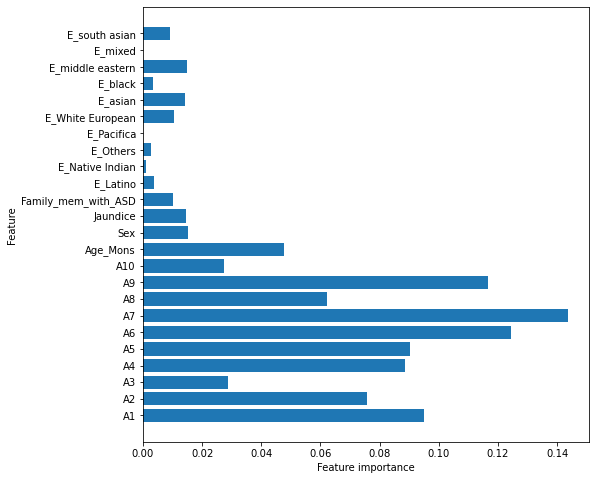

In [45]:
plot_feature_importances(RF)

24


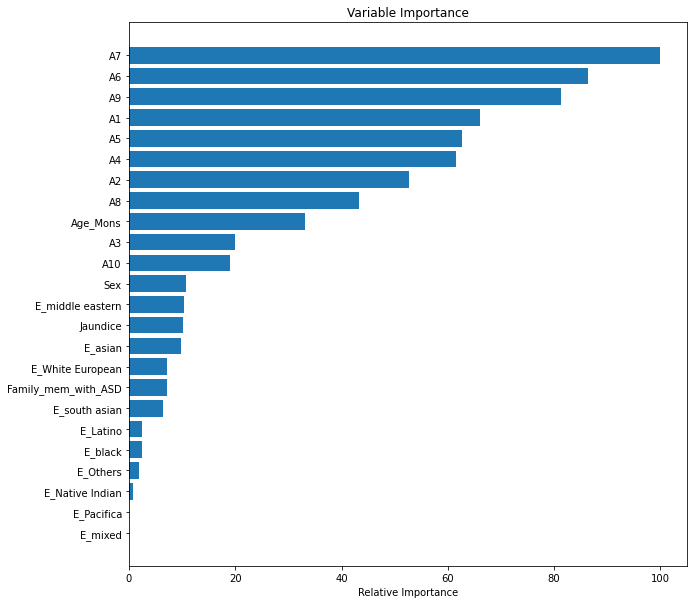

In [48]:
feature_importance = RF.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()